In [ ]:
import datetime
import scipy
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from cxotime import CxoTime
from ska_matplotlib import plot_cxctime

In [45]:
def create_csv():
    fot_mp_mission_efficiency = Table.read('FOTMP_mission_efficiency.csv')
    fot_mp_mission_efficiency = fot_mp_mission_efficiency[['date', 'science orbit efficiency', 'total observation time', 'overall efficiency']]
    for key in ["science orbit efficiency", "total observation time", "overall efficiency"]:
        fot_mp_mission_efficiency[key] = [
            float(val.replace("%","")) for val in fot_mp_mission_efficiency[key]
        ]
    fot_mp_mission_efficiency['date'] = [CxoTime(datetime.datetime.strptime(val, '%m/%d/%y')) for val in fot_mp_mission_efficiency['date']]
    fot_mp_mission_efficiency.write('fot_mp_mission_efficiency.csv', overwrite=True)

In [70]:
fot_mp_mission_efficiency = Table.read('fot_mp_mission_efficiency.csv')

(0.0, 100.0)

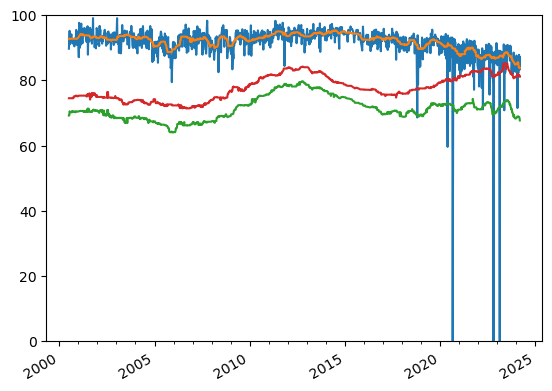

In [71]:
plot_cxctime(
    fot_mp_mission_efficiency['date'],
    fot_mp_mission_efficiency['science orbit efficiency'],
)
kernel_size = 27
plot_cxctime(
    fot_mp_mission_efficiency['date'],
    scipy.ndimage.median_filter(fot_mp_mission_efficiency["science orbit efficiency"], kernel_size),
)
plot_cxctime(
    fot_mp_mission_efficiency['date'],
    scipy.ndimage.median_filter(fot_mp_mission_efficiency["total observation time"], kernel_size),
)
plot_cxctime(
    fot_mp_mission_efficiency['date'],
    scipy.ndimage.median_filter(fot_mp_mission_efficiency["overall efficiency"], kernel_size),
)
plt.ylim((0, 100))